# BLENDING AND PASTING OF IMAGES

In [2]:
# Blending method -> addWeighted()
# Formula used -> α pixel_1 + ꞵ pixel_2 + γ

In [3]:
import cv2

In [4]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

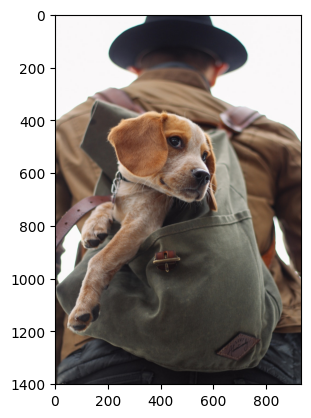

In [6]:
plt.imshow(img1)

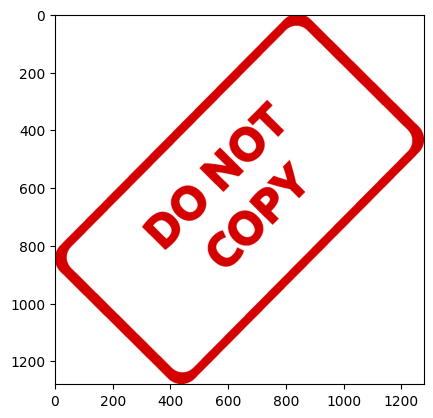

In [7]:
plt.imshow(img2)

In [8]:
img1.shape

(1401, 934, 3)

In [9]:
img2.shape

(1280, 1277, 3)

### BLENDING IMAGES OF SAME SIZES

In [10]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

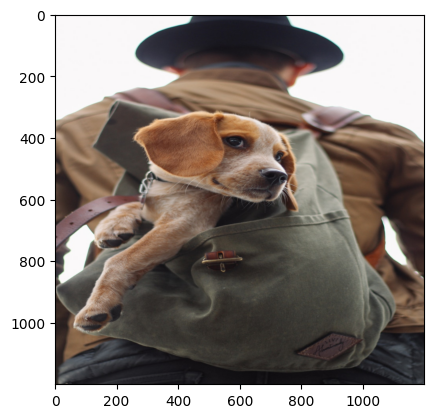

In [11]:
plt.imshow(img1)

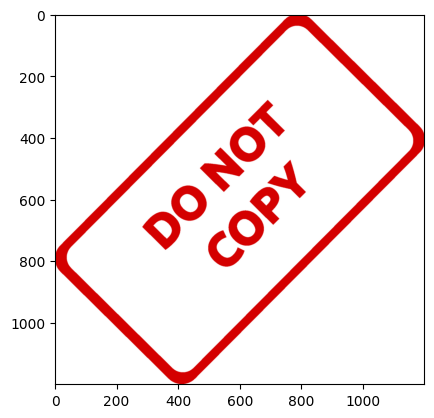

In [12]:
plt.imshow(img2)

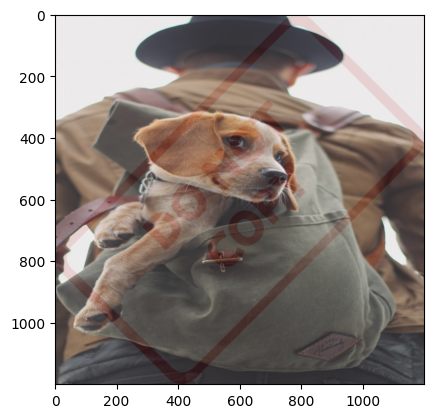

In [20]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=10)
plt.imshow(blended)

### REGION OF IMAGE (ROI)

In [21]:
# Overlaying the small image on the top of large image (NO BLENDING)
# Numpy reassignment

In [22]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [25]:
img2 = cv2.resize(img2, (600, 600))

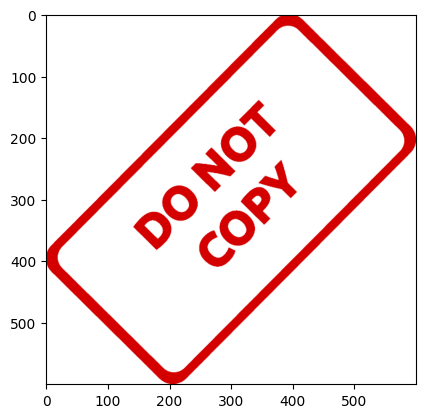

In [26]:
plt.imshow(img2)

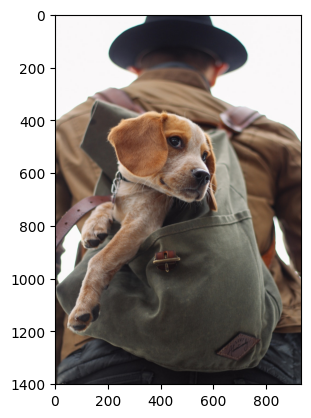

In [27]:
plt.imshow(img1)

In [28]:
large_img = img1
small_img = img2

In [29]:
x_offset = 0
y_offset = 0

In [34]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
# print(x_end)

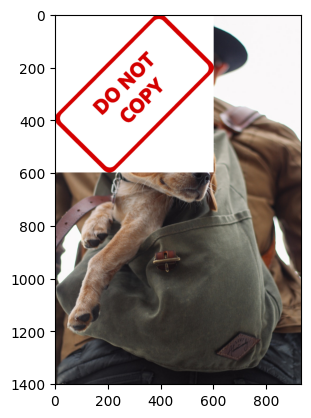

In [35]:
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

# Blending the small image on the bottom right of large image

In [37]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [38]:
img2 = cv2.resize(img2, (600, 600))

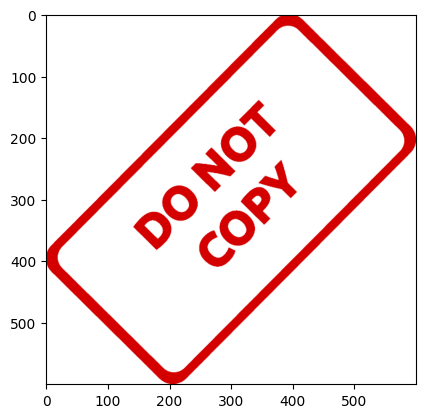

In [39]:
plt.imshow(img2)

In [44]:
img1.shape

(1401, 934, 3)

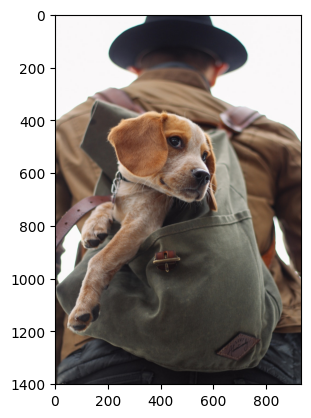

In [45]:
plt.imshow(img1)

In [41]:
x_offset = 934 - 600
y_offset = 1401 - 600

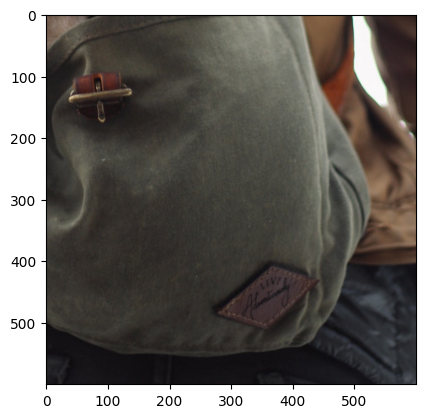

In [47]:
segment = img1[y_offset:1401, x_offset:934]
plt.imshow(segment)

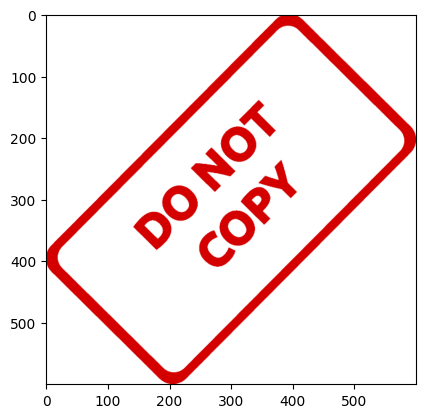

In [49]:
plt.imshow(img2)

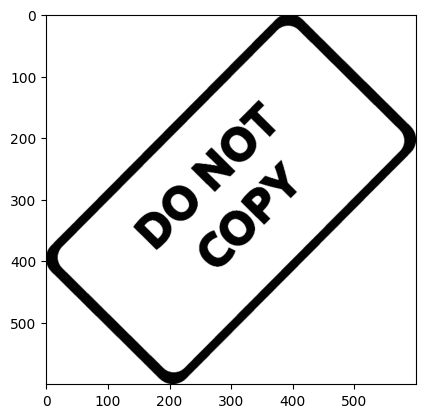

In [52]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')  # Using cmap parameter -> visualizing in only black and white

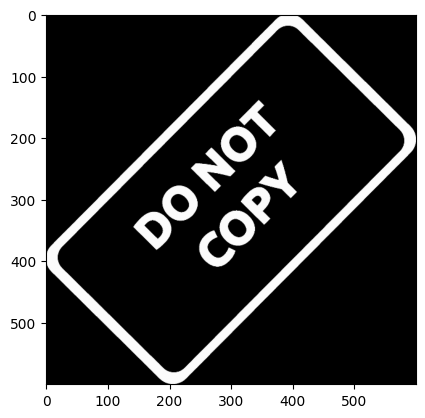

In [55]:
mask_inv = cv2.bitwise_not(img2gray)      # bitwise_not() -> inversing the each pixel value
plt.imshow(mask_inv, cmap='gray')         # using bitwise_not() and cmap -> Inversing the black to white and white to black

In [56]:
import numpy as np

In [57]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [59]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [60]:
bk.shape

(600, 600, 3)

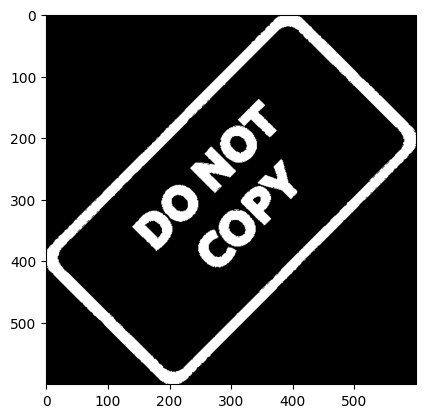

In [61]:
plt.imshow(bk)

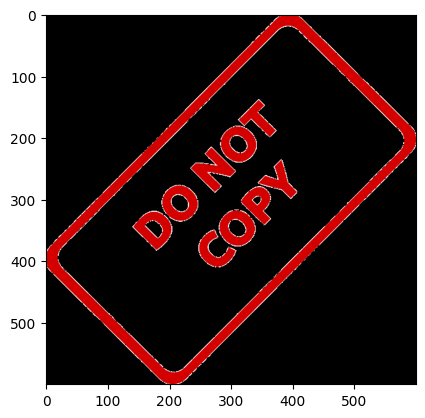

In [62]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

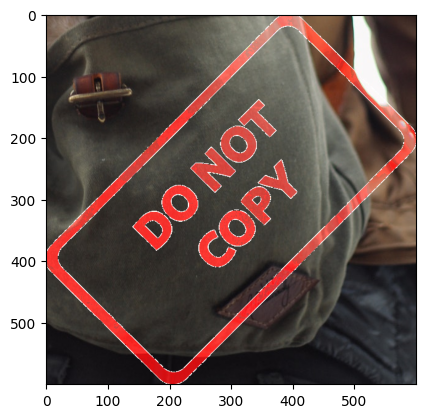

In [63]:
final_roi = cv2.bitwise_or(segment, fg)
plt.imshow(final_roi)

In [64]:
large_img = img1
small_img = final_roi

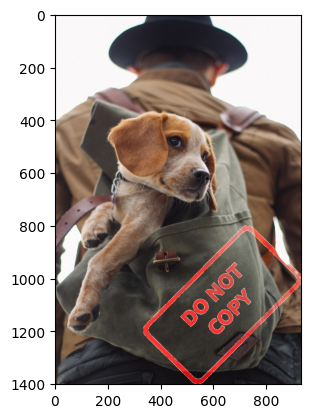

In [65]:
large_img[y_offset:1401, x_offset:934] = small_img
plt.imshow(large_img)